In [19]:
import pandas as pd
import numpy as np
import csv
import os
import time
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

os.chdir('/san-data/usecase/magnet_g/misc/PCA_DATA_VIS') 
data = np.genfromtxt('new_datas2.csv', delimiter = ',', names = True, dtype = None)
df = pd.DataFrame(data)

In [20]:
df = df.drop(["trip_number", "timestmp_local", "Hour_editing_needed", "Date", "speed_lim1", 
              "Hour", "Minute", "Second", "latitude", "longitude", "ratio", "road_type",
              "algorithm", "lag_speed"], axis = 1)
df['Mode'] = np.where(df['lonG'] >= 0, 'Acceleration', 'Deceleration')
df = df.dropna(axis = 0, how = "all")
rndperm = np.random.permutation(df.shape[0])

In [22]:
n_sne = 10000
time_start = time.time()
tsne = TSNE(n_components = 2, verbose = 1, perplexity = 40, n_iter = 300)
tsne_results = tsne.fit_transform(df.loc[rndperm[:n_sne], list(df)[:-1]].values)
print 't-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.276210
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.232047
[t-SNE] Error after 300 iterations: 1.232047
t-SNE done! Time elapsed: 345.010205984 seconds


In [23]:
df_tsne = df.loc[rndperm[:n_sne],:].copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]
df_tsne = df_tsne.dropna(axis = 0, how = "all")
# df_tsne.dtypes Display types for each row

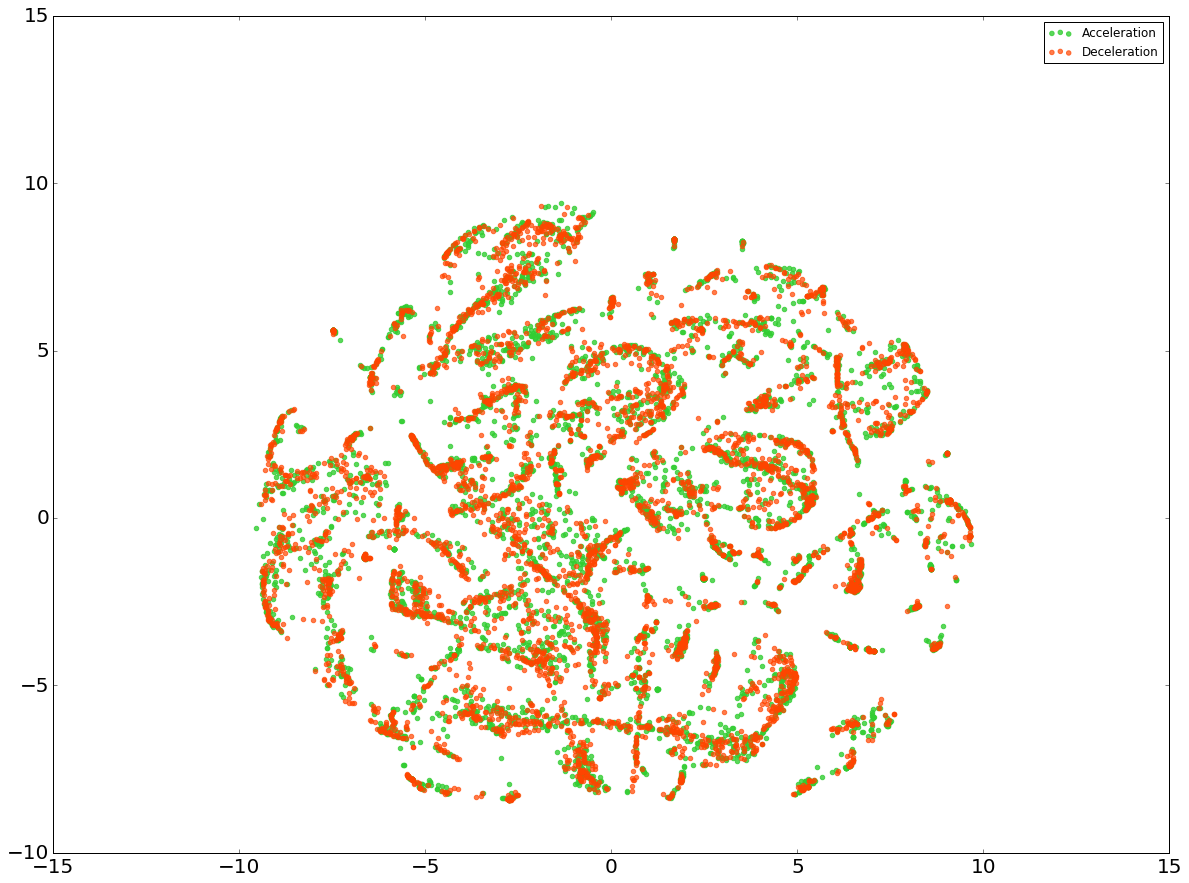

In [29]:
# Display acceleration / deceleration
fig, ax = plt.subplots(figsize = (20, 15))
ax.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'].where(df_tsne['Mode'] == 'Acceleration'), label = "Acceleration", 
           color = "limegreen", alpha = 0.8)
ax.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'].where(df_tsne['Mode'] == 'Deceleration'), label = "Deceleration", 
           color = "orangered", alpha = 0.7)
ax.legend()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.show()

In [41]:
n_sne = 10000
time_start = time.time()
tsne = TSNE(n_components = 2, verbose = 1, perplexity = 40, n_iter = 300)
tsne_results = tsne.fit_transform(df.loc[rndperm[:n_sne], 
                                         list(df[['avg_speed', 'latG', 'lonG', 'ang_speed_gyro', 'avg_latG', 'avg_latG_mag']])].values)
print 't-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.323306
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.234971
[t-SNE] Error after 300 iterations: 1.234971
t-SNE done! Time elapsed: 386.495001078 seconds


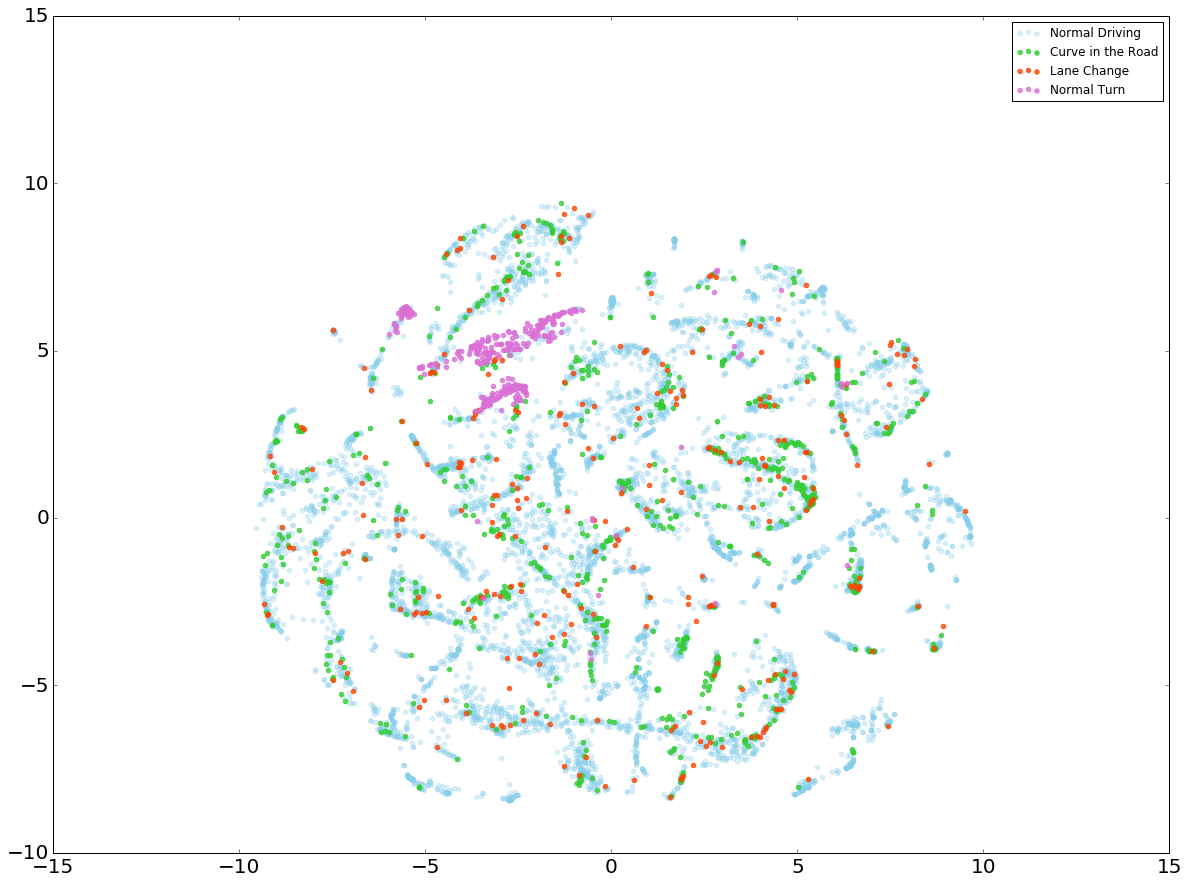

In [45]:
# Display algorithm: Curve in the road, Lane Change, Normal Driving, 
fig, ax = plt.subplots(figsize = (20, 15))
ax.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'].where(df_tsne['algorithmNormal_Driving'] == 1),
           label = "Normal Driving", color = "skyblue", alpha = 0.3)
ax.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'].where(df_tsne['algorithmCurve_in_the_road'] == 1), 
           label = "Curve in the Road", color = "limegreen", alpha = 0.8)
ax.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'].where(df_tsne['algorithmLane_Change'] == 1),
           label = "Lane Change", color = "orangered", alpha = 0.8)
ax.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'].where(df_tsne['algorithmNormal_Turn'] == 1),
           label = "Normal Turn", color = "orchid", alpha = 0.8)

ax.legend()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.show()

['avg_speed', 'latG', 'lonG', 'ang_speed_gyro', 'avg_latG', 'avg_latG_mag']